In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='mlybollinger', api_key='zoVLG9ZosuYxaotEt4ff')

In [3]:
import dash
from dash import dcc
from dash import html
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from dash.dependencies import Input, Output

In [4]:
def interpret_score(string):
    if string == "y":
        return 1
    elif string == "mb":
        return .5
    elif string == "n":
        return 0
    
df = pd.read_csv('df_with_scores.csv')
df['scores'] = df['scores'].apply(interpret_score)
print(df.head())



   Unnamed: 0  Unnamed: 0_x                   filename  file_size  pixels  \
0           0             0  3_1534929690548387841.png      37611   38025   
1           1             1  3_1466060138289283079.png      51908   28575   
2           2             2  3_1369287194674921475.png      59488   46125   
3           3             3  3_1330890143285325824.png      54465   35775   
4           4             4  3_1479278620615000066.png      50258   49725   

  prompt_0 prompt_1 prompt_2 prompt_3 prompt_4 prompt_5 prompt_6 prompt_7  \
0       no      yes       no      yes       no       no    plant       no   
1       no       no       no       no      yes       no    plant      yes   
2      yes      yes       no       no       no       no    plant      yes   
3      yes       no      yes      yes      yes       no    plant       no   
4       no       no       no       no       no      yes    plant      yes   

   Unnamed: 0_y                                            caption     sco

In [6]:
app = dash.Dash()
app.layout = html.Div([
                html.Div([
                    html.B([html.U('Image Attributes')]),
                    html.P(),
                    dcc.RadioItems([{'label': 'art', 'value': 'yes'}, {'label': 'not art', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_art'),
                    dcc.RadioItems([{'label': 'text', 'value': 'yes'}, {'label': 'not text', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='has_text'),
                    dcc.RadioItems([{'label': 'black-and-white', 'value': 'yes'}, {'label': 'not black-and-white', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_black_and_white'),
                    dcc.RadioItems([{'label': 'person', 'value': 'yes'}, {'label': 'not person', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_person'),
                    dcc.RadioItems([{'label': 'animal', 'value': 'yes'}, {'label': 'not animal', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_animal'),
                    dcc.RadioItems([{'label': 'machine', 'value': 'yes'}, {'label': 'not machine', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_machine'),
                    dcc.RadioItems([{'label': 'inanimate', 'value': 'yes'}, {'label': 'not inanimate', 'value': 'no'}, {'label': 'both', 'value': 'both'}], 'both', id='is_inanimate'),
            ],style={'width':'50%','display':'inline-block', 'padding-left':'80px'}),
    dcc.Graph(id="score_figure"),
])

@app.callback(
    Output('score_figure', 'figure'),
    Input('is_art', 'value'),
    Input('has_text', 'value'),
    Input('is_black_and_white', 'value'),
    Input('is_person', 'value'),
    Input('is_animal', 'value'),
    Input('is_machine', 'value'),
    Input('is_inanimate', 'value'))

def update_figure(art_response, text_response, bw_response, person_response,
                 animal_response, machine_response, inan_response):
    
    if art_response == 'both':
        filtered_df = df
    else:
        filtered_df = df[df.prompt_0 == art_response]
    
    if text_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_1 == text_response]
    
    if bw_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_2 == bw_response]
    
    if person_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_3 == person_response]
    
    if animal_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_4 == animal_response]
    
    if machine_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_5 == machine_response]
    
    if inan_response != 'both':
        filtered_df = filtered_df[filtered_df.prompt_7 == inan_response]
    

    fig = go.Figure(go.Scatter(x=filtered_df['score'], y=filtered_df['scores'], mode="markers"))
    fig.add_vline(x=filtered_df['score'].mean(), line_width=3, line_color="orange")

    fig.update_layout(transition_duration=500)
        
    fig.update_xaxes(title='model score')
    fig.update_yaxes(title='human score')
    

    return fig

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


In [3]:
import chart_studio.plotly as py
import plotly.graph_objects as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17], mode='markers+text'
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)

'''
data = [trace0, trace1]

py.iplot(data, filename = 'basic-line', auto_open=False)
'''
py.iplot(go.Figure(trace0))

In [6]:
help(py.iplot)

Help on function iplot in module chart_studio.plotly.plotly:

iplot(figure_or_data, **plot_options)
    Create a unique url for this plot in Plotly and open in IPython.
    
    plot_options keyword arguments:
    filename (string) -- the name that will be associated with this figure
    sharing ('public' | 'private' | 'secret') -- Toggle who can view this graph
        - 'public': Anyone can view this graph. It will appear in your profile
                    and can appear in search engines. You do not need to be
                    logged in to Plotly to view this chart.
        - 'private': Only you can view this plot. It will not appear in the
                     Plotly feed, your profile, or search engines. You must be
                     logged in to Plotly to view this graph. You can privately
                     share this graph with other Plotly users in your online
                     Plotly account and they will need to be logged in to
                     view this plot

In [2]:
metadata = pd.read_csv('metadata.csv')
scores = pd.read_csv('scores.csv')

df = pd.merge(metadata, scores, how='inner', on='filename')
df.head()

,Unnamed: 0_x,filename,file_size,pixels,prompt_0,prompt_1,prompt_2,prompt_3,prompt_4,prompt_5,prompt_6,prompt_7,Unnamed: 0_y,caption,score
0,0,3_1534929690548387841.png,37611,38025,no,yes,no,yes,no,no,plant,no,0,"a black vinyl record with the words,'the parad...",0.999934
1,1,3_1466060138289283079.png,51908,28575,no,no,no,no,yes,no,plant,yes,1,a sun on a blue background,0.999634
2,2,3_1369287194674921475.png,59488,46125,yes,yes,no,no,no,no,plant,yes,2,two birds sitting on top of a tree,0.000175
3,3,3_1330890143285325824.png,54465,35775,yes,no,yes,yes,yes,no,plant,no,3,a woman carrying a bunch of flowers,0.350701
4,4,3_1479278620615000066.png,50258,49725,no,no,no,no,no,yes,plant,yes,4,a cell phone on a table,0.310349


In [3]:
df['compress_rat'] = df['pixels'] / df['file_size'] * 8

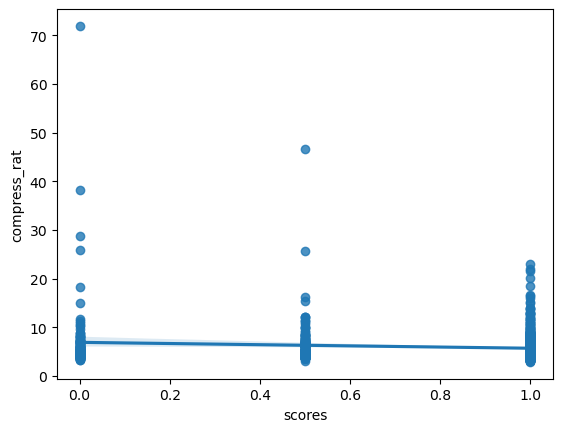

In [37]:
sns.regplot(data=df, x='scores', y='compress_rat')
plt.show()

In [12]:
for i in range(8):
    print(df.groupby("prompt_" + str(i)).mean())

          Unnamed: 0_x     file_size        pixels  Unnamed: 0_y     score  \
prompt_0                                                                     
no          499.604869  55068.471910  36210.674157    499.604869  0.786127   
yes         499.379828  57723.484979  36480.418455    499.379828  0.689342   

          compress_rat  
prompt_0                
no            6.219807  
yes           5.622165  
          Unnamed: 0_x     file_size       pixels  Unnamed: 0_y     score  \
prompt_1                                                                    
no          499.366032  57849.502196  36890.11713    499.366032  0.756465   
yes         499.788644  52979.488959  35143.29653    499.788644  0.707760   

          compress_rat  
prompt_1                
no            5.956693  
yes           5.908154  
          Unnamed: 0_x     file_size        pixels  Unnamed: 0_y     score  \
prompt_2                                                                     
no          507.772786

In [10]:
# next step is to test the captions manually
def get_input():

    response = input('Is this caption appropriate?\n')

    response = response.lower()

    if response == 'y' or response == 'n' or response == 'mb':
        return response

    else:
        print("Not a valid response.\n")
        return get_input()


In [ ]:
human_scores = []
img_folder = 'C:\\Users\\mlybo\\OneDrive\\Documents\\sample_project_imgs\\'


for i, row in df.iterrows():
    if i > 1 and i % 100 == 0:
        print(str(i) + " rows completed! \n")
    filename = row['filename']
    im = Image.open(img_folder + filename)
    im.show()
    print(row['caption'])
    score = get_input()
    print("\n")
    human_scores.append(score)
    im.close()

a black vinyl record with the words,'the paradise boys'on it
Is this caption appropriate?
mb


a sun on a blue background
Is this caption appropriate?
y


two birds sitting on top of a tree
Is this caption appropriate?
y


a woman carrying a bunch of flowers
Is this caption appropriate?
n


a cell phone on a table
Is this caption appropriate?
n


a group of men walking down the street
Is this caption appropriate?
mb


a woman
Is this caption appropriate?
n


some flowers on a pink background
Is this caption appropriate?
y


a group of people in front of a cherry tree
Is this caption appropriate?
y


a man sitting on a bench
Is this caption appropriate?
n


an american flag on a building
Is this caption appropriate?
mb


a woman's head
Is this caption appropriate?
mb


a sun on a blue background
Is this caption appropriate?
y


a music player on a cd
Is this caption appropriate?
mb


a bunch of different colored circles
Is this caption appropriate?
mb


a man singing into a microphone
I

Is this caption appropriate?
mb


two people standing in the woods
Is this caption appropriate?
y


boxes stacked on a wall
Is this caption appropriate?
y


some food items on a table
Is this caption appropriate?
n


an airplane flying in the sky
Is this caption appropriate?
y


a bunch of pictures on a screen
Is this caption appropriate?
mb


an old document with writing on it
Is this caption appropriate?
y


books on a shelf
Is this caption appropriate?
y


a map of the united states
Is this caption appropriate?
mb


a man in a blue and red shirt
Is this caption appropriate?
n


a sign on a book shelf
Is this caption appropriate?
n


a statue of a man
Is this caption appropriate?
y


a cat sleeping on a piece of paper
Is this caption appropriate?
mb


a group of men sitting around a table
Is this caption appropriate?
y


a woman in a dress
Is this caption appropriate?
y


a book with a picture of a scorpion on it
Is this caption appropriate?
n


a purple background with the words for



a plane in a museum
Is this caption appropriate?
y


a red house in the woods
Is this caption appropriate?
y


a group of children playing in a field
Is this caption appropriate?
y


flowers in a book
Is this caption appropriate?
y


a room filled with statues
Is this caption appropriate?
y


a green mailbox
Is this caption appropriate?
y


a group of people sitting around a table
Is this caption appropriate?
mb


a building with a clock tower
Is this caption appropriate?
n


a kitchen with the words art talk with music for elephants
Is this caption appropriate?
n


a building that is in the middle of a street
Is this caption appropriate?
n


a mountain with rocks and trees
Is this caption appropriate?
y


an advertisement for a radio
Is this caption appropriate?
n


an african woman with the words we speak
Is this caption appropriate?
y


a heart shaped sculpture in a park
Is this caption appropriate?
y


strawberries on a plant
Is this caption appropriate?
y


a handwritten note
Is



two people cooking in a kitchen
Is this caption appropriate?
y


a wall covered in graffiti
Is this caption appropriate?
y


an old book with writing on it
Is this caption appropriate?
y


a leaf in a jar
Is this caption appropriate?
y


two people sitting on a bench
Is this caption appropriate?
mb


a woman in a fur coat
Is this caption appropriate?
mb


some white objects on a table
Is this caption appropriate?
y


a tree made out of wine bottles
Is this caption appropriate?
y


a building with a sign that says future
Is this caption appropriate?
y


an old book on a black background
Is this caption appropriate?
y


a baseball player holding a bat
Is this caption appropriate?
y


a red panda in the snow
Is this caption appropriate?
y


a woman sitting in front of a book shelf
Is this caption appropriate?
y


two men in a lab
Is this caption appropriate?
y


a man sitting in a chair
Is this caption appropriate?
mb


a group of people in a room
Is this caption appropriate?
mb


a wom

Is this caption appropriate?
y


a sun on a blue background
Is this caption appropriate?
y


a man holding a baby
Is this caption appropriate?
y


a woman on a bicycle
Is this caption appropriate?
n


a man with a mustache and a stamp
Is this caption appropriate?
y


a forest with trees in the background
Is this caption appropriate?
y


a group of people in a room
Is this caption appropriate?
y


a blue and white pattern
Is this caption appropriate?
y


a river surrounded by trees
Is this caption appropriate?
y


an old woman sitting at a table
Is this caption appropriate?
y


plants in a greenhouse
Is this caption appropriate?
y


a pink card with the words analyzing biodiversity literature sale
Is this caption appropriate?
y


a galaxy with many stars
Is this caption appropriate?
y


two panda bears sitting on a log
Is this caption appropriate?
y


a spiral galaxy
Is this caption appropriate?
y


a person dressed as a skeleton
Is this caption appropriate?
y


a bee and a bee on a gre


for i, row in df.iterrows():
    if i < 530:
        continue
        
    if i > 1 and i % 100 == 0:
        print(str(i) + " rows completed! \n")
    filename = row['filename']
    im = Image.open(img_folder + filename)
    im.show()
    print(row['caption'])
    score = get_input()
    print("\n")
    human_scores.append(score)
    im.close()

In [17]:
print(len(human_scores))

648


In [18]:
for i, row in df.iterrows():
    if i < 648:
        continue
        
    if i > 1 and i % 100 == 0:
        print(str(i) + " rows completed! \n")
    filename = row['filename']
    im = Image.open(img_folder + filename)
    im.show()
    print(row['caption'])
    score = get_input()
    print("\n")
    human_scores.append(score)
    im.close()

a woman holding a box of books
Is this caption appropriate?
y


a piece of paper and a pair of glasses
Is this caption appropriate?
n


a pink flower in someone's hand
Is this caption appropriate?
y


a mars rover rover rover rover rover rover rover rover rover rover rover rover rover rover
Is this caption appropriate?
y


a group of people in an art gallery
Is this caption appropriate?
y


the smithsonian folk festival logo
Is this caption appropriate?
y


a woman in black and white
Is this caption appropriate?
y


a flower on a tree
Is this caption appropriate?
y


a ship with people on it
Is this caption appropriate?
y


a woman in an airplane
Is this caption appropriate?
y


a bird on a piece of paper
Is this caption appropriate?
n


a group of people standing in front of the washington monument
Is this caption appropriate?
y


the cover of a book with a drawing of a man's face
Is this caption appropriate?
y


a pair of blue toothbrushs
Is this caption appropriate?
n


a spiral gal

Is this caption appropriate?
y


a woman in a costume
Is this caption appropriate?
y


a light bulb with the words black inventors new perspectives
Is this caption appropriate?
y


the cover of the book international day of remembrance of the victims and the transatlantic slave
Is this caption appropriate?
y


a ball of wood sticks
Is this caption appropriate?
y


an old camera on a white surface
Is this caption appropriate?
y


four men in black and white
Is this caption appropriate?
mb


a little girl looking at art on a wall
Is this caption appropriate?
y


a sun on a blue background
Is this caption appropriate?
y


a band performing on stage
Is this caption appropriate?
y


a plant with flowers in the background
Is this caption appropriate?
y


a room with many pictures on the wall
Is this caption appropriate?
y


a pond with water lils
Is this caption appropriate?
y


a person holding a small fish
Is this caption appropriate?
6y
Not a valid response.

Is this caption appropriate?


Is this caption appropriate?
mb


a group of people fishing in a river
Is this caption appropriate?
y


a man and a woman working together
Is this caption appropriate?
y


a girl in the woods
Is this caption appropriate?
y


900 rows completed! 

a woman's red jacket
Is this caption appropriate?
y


a man in a suit and tie
Is this caption appropriate?
y


a bottle of beer on a table
Is this caption appropriate?
y


a group of people painting
Is this caption appropriate?
y


a red brick building
Is this caption appropriate?
y


a nebula in the sky
Is this caption appropriate?
y


an elephant in a book
Is this caption appropriate?
y


a machine with gears on it
Is this caption appropriate?
y


a building made out of paper
Is this caption appropriate?
y


a tree and some yellow flowers
Is this caption appropriate?

Not a valid response.

Is this caption appropriate?
y


a woman in black and white
Is this caption appropriate?
y


a group of men sitting on steps
Is this caption appropriate?

In [6]:
df[df.prompt_0 == 'yes']

,Unnamed: 0,Unnamed: 0_x,filename,file_size,pixels,prompt_0,prompt_1,prompt_2,prompt_3,prompt_4,prompt_5,prompt_6,prompt_7,Unnamed: 0_y,caption,score,compress_rat,scores
2,2,2,3_1369287194674921475.png,59488,46125,yes,yes,no,no,no,no,plant,yes,2,two birds sitting on top of a tree,0.000175,6.202932,1.0
3,3,3,3_1330890143285325824.png,54465,35775,yes,no,yes,yes,yes,no,plant,no,3,a woman carrying a bunch of flowers,0.350701,5.254751,0.0
10,10,10,3_1253747899554463749.png,58857,38025,yes,no,no,no,no,no,plants,yes,10,an american flag on a building,0.622174,5.168459,0.5
16,16,16,3_1366403285192744966.png,50315,38925,yes,no,no,yes,yes,yes,plant,no,16,a woman wearing a hat,0.617691,6.189009,1.0
17,17,17,3_1229805710919159808.png,51282,38025,yes,yes,no,yes,no,no,plant,yes,17,a white building with a blue sky in the backgr...,0.979805,5.931906,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,986,986,3_1402303446901010437.png,57470,28800,yes,no,no,no,yes,no,plants,yes,986,a lake filled with water lilies,0.202699,4.009048,1.0
988,988,988,3_1283076785035517959.png,34208,25425,yes,no,no,no,no,yes,plant,yes,988,a ring made out of metal,0.984711,5.945978,1.0
991,991,991,3_1522556229645656069.png,89996,40500,yes,no,no,no,no,yes,flowers,yes,991,flowers in front of a sculpture,0.998953,3.600160,1.0
993,993,993,3_1532754744845996032.png,47450,30375,yes,yes,no,yes,no,no,plant,yes,993,a spiral with a quote on it,0.392236,5.121180,0.5


In [20]:
print(len(df))

1000


In [13]:
df['scores'] = human_scores

NameError: name 'human_scores' is not defined

In [22]:
df.to_csv('df_with_scores.csv')

In [5]:



df['scores'] = df['scores'].apply(interpret_score)
print(df.head())

   Unnamed: 0  Unnamed: 0_x                   filename  file_size  pixels  \
0           0             0  3_1534929690548387841.png      37611   38025   
1           1             1  3_1466060138289283079.png      51908   28575   
2           2             2  3_1369287194674921475.png      59488   46125   
3           3             3  3_1330890143285325824.png      54465   35775   
4           4             4  3_1479278620615000066.png      50258   49725   

  prompt_0 prompt_1 prompt_2 prompt_3 prompt_4 prompt_5 prompt_6 prompt_7  \
0       no      yes       no      yes       no       no    plant       no   
1       no       no       no       no      yes       no    plant      yes   
2      yes      yes       no       no       no       no    plant      yes   
3      yes       no      yes      yes      yes       no    plant       no   
4       no       no       no       no       no      yes    plant      yes   

   Unnamed: 0_y                                            caption     sco

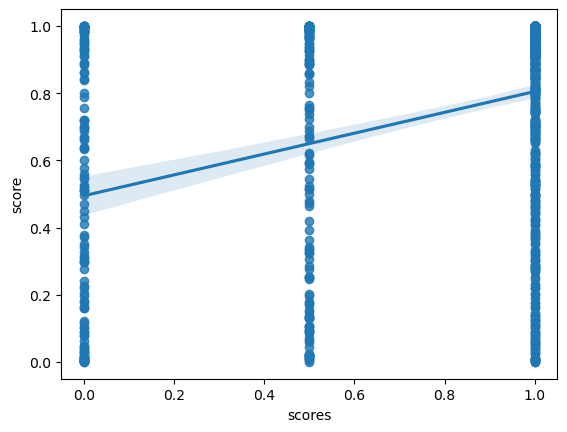

In [38]:
sns.regplot(data=df, y='score', x='scores')
plt.show()

In [39]:
df_mod[['compress_rat', 'scores', 'score']].corr()

,compress_rat,scores,score
compress_rat,1.000000,-0.045799,-0.001098
scores,-0.045799,1.000000,0.346054
score,-0.001098,0.346054,1.000000


In [28]:
for i in range(8):
    print(df.groupby("prompt_" + str(i)).mean())

          Unnamed: 0_x     file_size        pixels  Unnamed: 0_y     score  \
prompt_0                                                                     
no          499.604869  55068.471910  36210.674157    499.604869  0.786127   
yes         499.379828  57723.484979  36480.418455    499.379828  0.689342   

          compress_rat    scores  
prompt_0                          
no            6.219807  0.829588  
yes           5.622165  0.753219  
          Unnamed: 0_x     file_size       pixels  Unnamed: 0_y     score  \
prompt_1                                                                    
no          499.366032  57849.502196  36890.11713    499.366032  0.756465   
yes         499.788644  52979.488959  35143.29653    499.788644  0.707760   

          compress_rat    scores  
prompt_1                          
no            5.956693  0.811127  
yes           5.908154  0.757098  
          Unnamed: 0_x     file_size        pixels  Unnamed: 0_y     score  \
prompt_2            

   Unnamed: 0  Unnamed: 0_x                   filename  file_size  pixels  \
0           0             0  3_1534929690548387841.png      37611   38025   
1           1             1  3_1466060138289283079.png      51908   28575   
2           2             2  3_1369287194674921475.png      59488   46125   
3           3             3  3_1330890143285325824.png      54465   35775   
4           4             4  3_1479278620615000066.png      50258   49725   

  prompt_0 prompt_1 prompt_2 prompt_3 prompt_4 prompt_5 prompt_6 prompt_7  \
0       no      yes       no      yes       no       no    plant       no   
1       no       no       no       no      yes       no    plant      yes   
2      yes      yes       no       no       no       no    plant      yes   
3      yes       no      yes      yes      yes       no    plant       no   
4       no       no       no       no       no      yes    plant      yes   

   Unnamed: 0_y                                            caption     sco

In [26]:
trace0 = go.Scatter(
    x=df.score,
    y=df.compress_rat, mode='markers+text'
)

py.iplot(go.Figure(trace0))

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from dash.dependencies import Input, Output

C:\Users\mlybo\miniconda3\envs\holford\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
C:\Users\mlybo\miniconda3\envs\holford\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.prompt_0.unique()

array(['no', 'yes'], dtype=object)